### Many-body Entanglement and Tensor Networks
Tutorials based on the 2017 Perimeter Scholar International Condensed Matter Review course taught by Guifre Vidal

# <span style="color:#0C45A9">Python tutorial 1 - part 2 </span>

This is the second part of tutorial 1. In this notebook we will solve the ground-state energy of the quantum Ising model for 3 spins through exact diagonalisation of the Hamiltonian.

## 1.4. Quantum Ising model on $N=3$ spins

The Hamiltonian for this system is: $H = \sigma^x_1 \otimes \sigma^x_2 + \sigma^x_2 \otimes \sigma^x_3 +  \sigma^x_3 \otimes \sigma^x_1 + h\left( \sigma^z_1 + \sigma^z_2 + \sigma^z_3\right) $

In [1]:
import numpy as np

I = np.eye(2) #2x2 identity matrix
II = np.eye(4) #4x4 identity matrix
X = np.array([[0,1],[1,0]]) #Pauli-X
Z = np.array([[1,0],[0,-1]]) #Pauli-Z
XX = np.kron(X,X) 

Let's get the terms of our Hamiltonian

In [2]:
H_XX = np.kron(XX,I) + np.kron(I, XX) + np.kron(X,np.kron(I,X)) #XX terms
H_Z = np.kron(Z,II) + np.kron(I,np.kron(Z,I)) + np.kron(II,Z) #Z terms

Get a list of possible values of the magnetic field $h$:

In [3]:
h_values = np.linspace(0,2,20)

For all the values of $h$, solve by exactly diagonalising and store the ground-state energy $E_0$:

In [4]:
E_0_values = []

for h in h_values:
    H = H_XX + h*H_Z #build the Hamiltonian
    D, U = np.linalg.eig(H)
    E_0_values.append(min(D)) #store the ground-state energy

/Users/sofiagonzalez/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


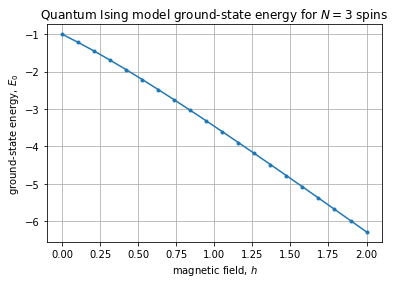

In [5]:
import matplotlib.pyplot as plt

plt.title("Quantum Ising model ground-state energy for $N=3$ spins")
plt.grid()
plt.ylabel("ground-state energy, $E_0$")
plt.xlabel("magnetic field, $h$")
plt.plot(h_values, E_0_values, ls = '-', marker = '.')

plt.show()